In [1]:
import sys, os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Add src folder to path
sys.path.append(os.path.join("..", "src"))

from utils import load_dataset, build_label_maps, save_class_map

In [2]:
texts, labels = load_dataset(os.path.join("..", "dataset"))
len(texts), len(labels)


(300, 300)

In [3]:
label_to_id, id_to_label, y = build_label_maps(labels)

label_to_id


{'blocking_misuse': 0,
 'comb_loop': 1,
 'latch_inference': 2,
 'missing_default': 3,
 'multi_driver': 4,
 'syntax_error': 5,
 'unused_signal': 6,
 'width_mismatch': 7}

In [4]:
vectorizer = TfidfVectorizer(max_features=6000)
X = vectorizer.fit_transform(texts)

X.shape


(300, 64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
model = LogisticRegression(max_iter=2500)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2500
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test)

# Sort labels for readable reporting
sorted_labels = [id_to_label[i] for i in sorted(id_to_label.keys())]
print(classification_report(y_test, y_pred, target_names=sorted_labels))


                 precision    recall  f1-score   support

blocking_misuse       1.00      1.00      1.00         8
      comb_loop       1.00      1.00      1.00         9
latch_inference       1.00      1.00      1.00         8
missing_default       1.00      1.00      1.00         7
   multi_driver       1.00      1.00      1.00         9
   syntax_error       1.00      1.00      1.00         6
  unused_signal       1.00      1.00      1.00         6
 width_mismatch       1.00      1.00      1.00         7

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



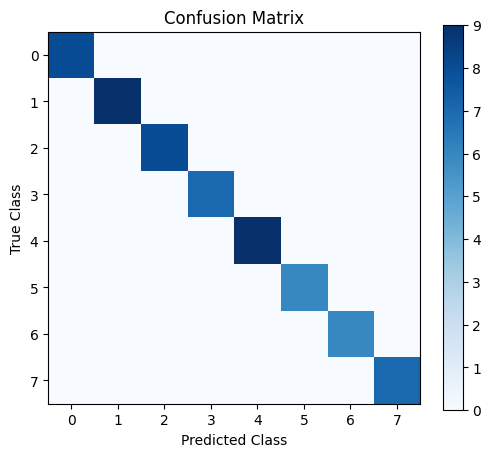

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


In [9]:
joblib.dump(model, "../src/model.pkl")
joblib.dump(vectorizer, "../src/vectorizer.pkl")
save_class_map(id_to_label, "../src/class_map.json")

"Artifacts saved."


'Artifacts saved.'